In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
(x_train, y_train), (x_test,y_test) = keras.datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

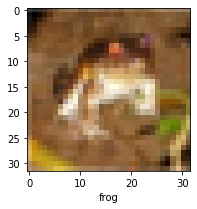

In [5]:
plt.figure(figsize = (15,3))
plt.imshow(x_train[0])
plt.xlabel(classes[y_train[0][0]])
plt.show()

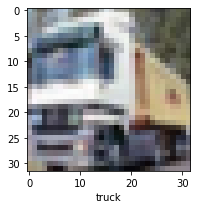

In [6]:
plt.figure(figsize = (15,3))
plt.imshow(x_train[1])
plt.xlabel(classes[y_train[1][0]])
plt.show()

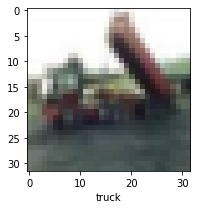

In [7]:
plt.figure(figsize = (15,3))
plt.imshow(x_train[2])
plt.xlabel(classes[y_train[2][0]])
plt.show()

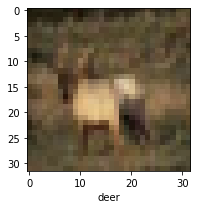

In [8]:
plt.figure(figsize = (15,3))
plt.imshow(x_train[3])
plt.xlabel(classes[y_train[3][0]])
plt.show()

In [9]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [10]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [11]:
x_train_scaled[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [12]:
x_train_scaled.shape

(50000, 32, 32, 3)

In [13]:
model = keras.Sequential([
    
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',input_shape = (32,32,3)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(x_train_scaled, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.3987 - accuracy: 0.5008
Epoch 2/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.0708 - accuracy: 0.6264
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9296 - accuracy: 0.6773
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8309 - accuracy: 0.7109
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7471 - accuracy: 0.7392
Epoch 6/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6797 - accuracy: 0.7631
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6164 - accuracy: 0.7854
Epoch 8/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5592 - accuracy: 0.8030
Epoch 9/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5055 - accuracy: 0.8225
Epoch 10/10
1563/1563 [==============================] - 21s 13m

In [15]:
model.evaluate(x_test_scaled,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9768 - accuracy: 0.7041


[0.9767776131629944, 0.7041000127792358]

In [16]:
y_predicted = model.predict(x_test_scaled)
y_predicted

313/313 [==============================] - 1s 5ms/step


array([[4.54814726e-04, 1.46994484e-03, 4.70936880e-04, ...,
        9.61412206e-06, 2.10903629e-04, 1.14337399e-06],
       [6.00992935e-04, 3.30800302e-02, 1.80273352e-09, ...,
        7.88441881e-12, 9.66258645e-01, 6.03103254e-05],
       [3.25596929e-02, 1.38816059e-01, 6.43660605e-04, ...,
        7.29992054e-04, 8.17659616e-01, 4.65437397e-03],
       ...,
       [1.98732050e-06, 3.90223853e-09, 4.44729999e-02, ...,
        7.23843230e-03, 1.63159252e-03, 1.17874556e-07],
       [1.92446887e-01, 6.95317388e-02, 4.55892365e-03, ...,
        2.50591010e-01, 1.78276183e-04, 1.72877320e-04],
       [6.93703361e-09, 2.98532726e-10, 3.22973779e-06, ...,
        9.99762237e-01, 3.46758559e-11, 2.18144858e-09]], dtype=float32)

In [17]:
y_pred = []
for i in y_predicted:
    y_pred.append(np.argmax(i))

In [18]:
y_test[:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)

In [19]:
y_pred[:10]

[3, 8, 8, 0, 4, 6, 1, 6, 3, 1]

In [20]:
from sklearn.metrics import confusion_matrix , classification_report

print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      1000
           1       0.79      0.83      0.81      1000
           2       0.62      0.58      0.60      1000
           3       0.53      0.48      0.50      1000
           4       0.59      0.74      0.66      1000
           5       0.67      0.53      0.59      1000
           6       0.80      0.77      0.78      1000
           7       0.75      0.75      0.75      1000
           8       0.79      0.84      0.81      1000
           9       0.80      0.75      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



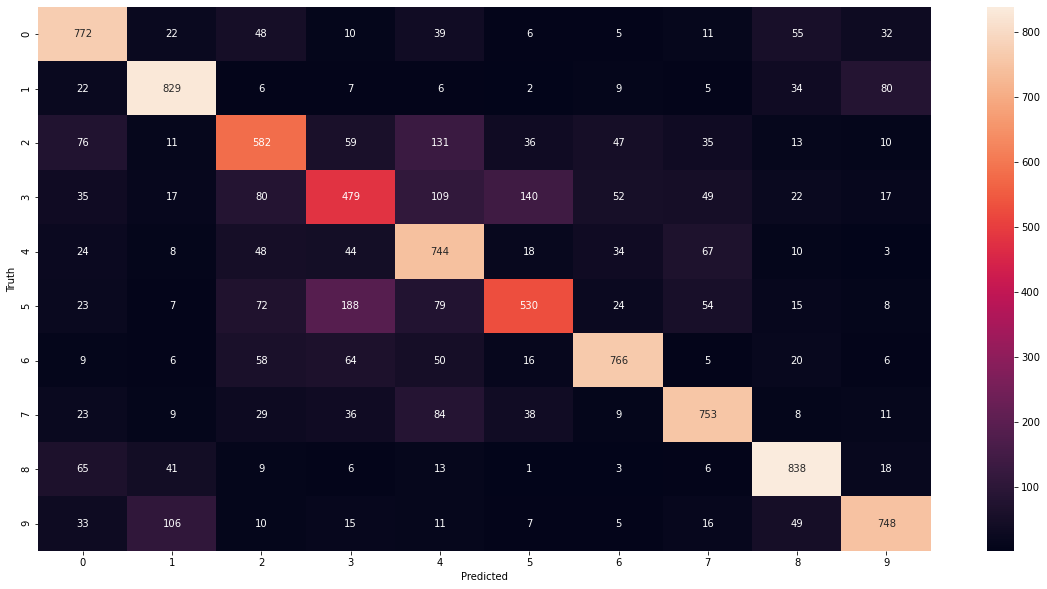

In [21]:
cm = tf.math.confusion_matrix(y_test,y_pred)
plt.figure(figsize = (20,10))
sns.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()